In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv(r"D:\cell_samples.csv") #r=raw string
df.head()            # class----benign(2) and malignant(4)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# We have to classify class as two clusters which are benign and malignant

In [8]:
df['Class'].value_counts()    # 458 records are benign and 241 records are malignant

2    458
4    241
Name: Class, dtype: int64

In [9]:
benign_df = df[df['Class']==2]              # Here we are making seperate dataframe from both the classes.
malignant_df = df[df['Class']==4]

# Plotting of two classes in same graph

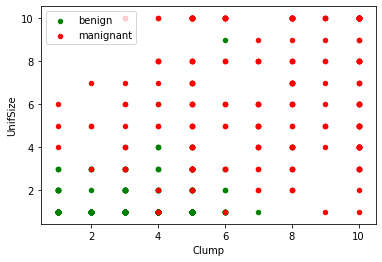

In [13]:
a = benign_df.plot(kind = 'scatter' , x = 'Clump', y= 'UnifSize',label = 'benign',color = 'g')
malignant_df.plot(kind = 'scatter' , x = 'Clump',y = 'UnifSize', label = 'manignant',color = 'r',ax =a)

# Now we have to remove the uneccesary datas

In [14]:
df_model = df[['Class','UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BlandChrom','NormNucl', 'Mit']]
# Class is our main attribute,we use class to test and train our model

In [17]:
X = np.asarray(df_model)                # X is for the training phase and y is for the testing phase
Y = np.asarray(df['Class'])

In [18]:
from sklearn.model_selection import train_test_split            # we are applying 80:20 ratio,80 for training the model and 20 for testing the model
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 4)

In [20]:
X_train.shape   # Total we have 699 records so 699 = 559+140

(559, 8)

In [21]:
Y_test.shape

(140,)

In [27]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C=2)
classifier.fit(X_train,Y_train)
Y_predict = classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report  #To check the accuracy we need to import confusion_matrix method of metrics class. The confusion matrix is a way of tabulating the number of mis-classifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.
classification_report(Y_test,Y_predict)

'              precision    recall  f1-score   support\n\n           2       1.00      1.00      1.00        88\n           4       1.00      1.00      1.00        52\n\n    accuracy                           1.00       140\n   macro avg       1.00      1.00      1.00       140\nweighted avg       1.00      1.00      1.00       140\n'

In [30]:
print(classification_report(Y_test,Y_predict))  # we come to conclusion that we have 88 women who are suffering from benign and 52 from manignant 

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        88
           4       1.00      1.00      1.00        52

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



# SVM(Support vector machine) algorithm -svm is basically used for supervised learning which means it deals with classification and regression ,and the dataset which is use with this is labelled.svm is a supervised algorithm that classifies cases by finding a seperator.